### Motivation
Exploring the dataset with messanger RNA and diging deeper into the topic I explored the tools for python that competition hosts sited too. There are already many EDAs to give you another plots and distributions and so on. In this notebook I will just plot a few RNA secondary structures. Perphaps there are some patterns you can derive from spacial model. Enjoy! :)

In [1]:
!pip3 install -q forgi[all]
!conda install -y -c bioconda viennarna

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - viennarna


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    viennarna-2.4.15           |   py37h13b99d1_0        14.2 MB  b

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 6);

In [3]:
root_dir = '../input/stanford-covid-vaccine'
train_path = os.path.join(root_dir, 'train.json')
test_path = os.path.join(root_dir, 'test.json')
bpps_dir = os.path.join(root_dir, 'bpps')

In [4]:
train = pd.read_json(train_path, lines=True)
test = pd.read_json(test_path, lines=True)
train.head(3)

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."


In [5]:
train.columns, test.columns

(Index(['index', 'id', 'sequence', 'structure', 'predicted_loop_type',
        'signal_to_noise', 'SN_filter', 'seq_length', 'seq_scored',
        'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
        'deg_error_Mg_50C', 'deg_error_50C', 'reactivity', 'deg_Mg_pH10',
        'deg_pH10', 'deg_Mg_50C', 'deg_50C'],
       dtype='object'),
 Index(['index', 'id', 'sequence', 'structure', 'predicted_loop_type',
        'seq_length', 'seq_scored'],
       dtype='object'))

In [6]:
for c in train.columns:
    if train[c].dtype == 'object':
        print(c, ':', train[c].apply(lambda x: len(x))[0])

id : 12
sequence : 107
structure : 107
predicted_loop_type : 107
reactivity_error : 68
deg_error_Mg_pH10 : 68
deg_error_pH10 : 68
deg_error_Mg_50C : 68
deg_error_50C : 68
reactivity : 68
deg_Mg_pH10 : 68
deg_pH10 : 68
deg_Mg_50C : 68
deg_50C : 68


In [7]:
def plot_sample():
    samp = train.sample(1)
    rna = []
    seq = samp.loc[samp.index[0], 'sequence']
    struct = samp.loc[samp.index[0], 'structure']
    bg = fgb.BulgeGraph.from_fasta_text(f'>rna1\n{struct}\n{seq}')[0]
    fvm.plot_rna(bg)
    plt.show()

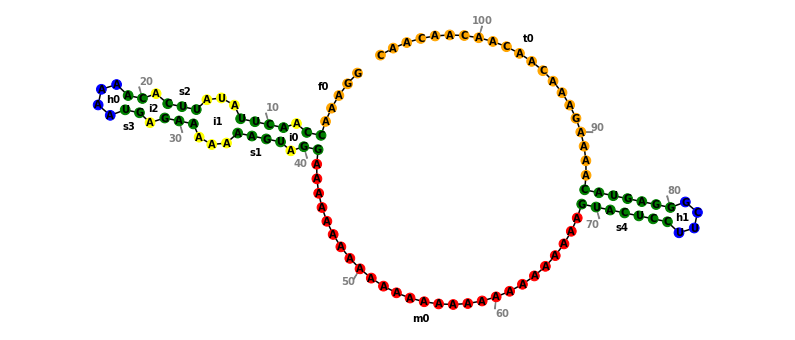

In [8]:
plot_sample()

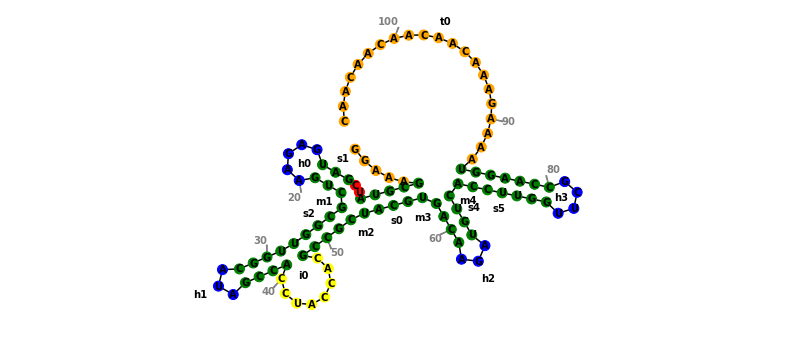

In [9]:
plot_sample()

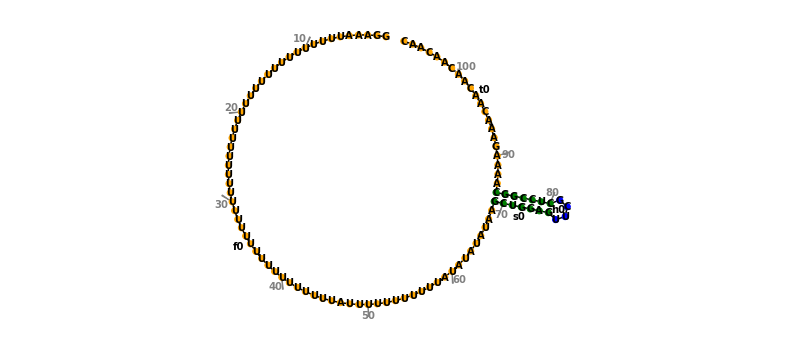

In [10]:
plot_sample()

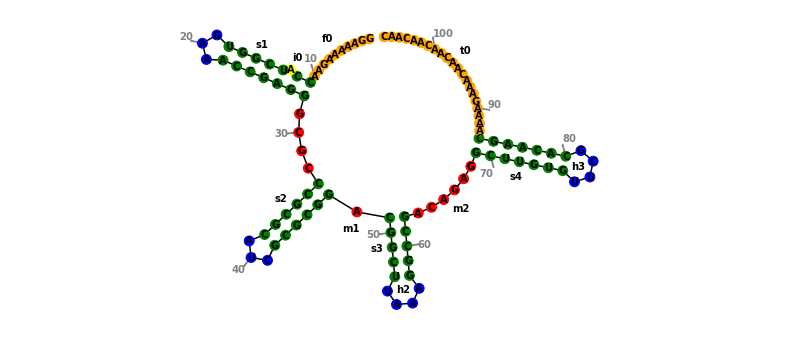

In [11]:
plot_sample()

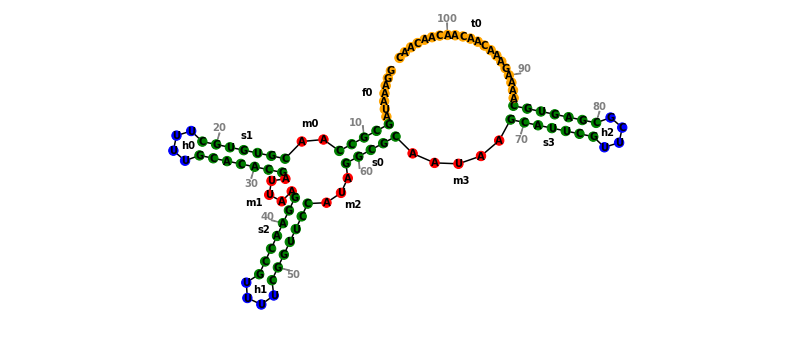

In [12]:
plot_sample()

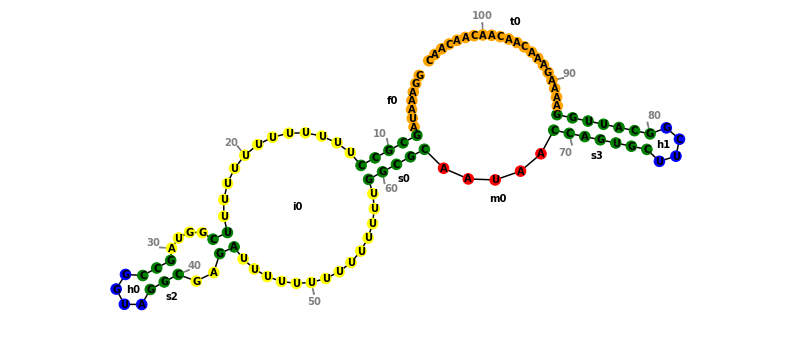

In [13]:
plot_sample()